# Comprehensive Guide to Using And Querying Neo4j Graph Databases in Python

## Introduction to Graph Databases and Neo4j

Data scientists start learning about SQL from the cradle. That's understandable given the ubiquity and high usefulness of tabular information. However, there are other successful database formats like graph databases to store connected data that don't fit into a relational SQL database. In this tutorial, we will learn about Neo4j, a popular graph database management system, to create, manage and query graph databases in Python. 

### What are graph databases?


Before we start talking all about Neo4j, let's take a moment to understand graph databases better. 

Graph databases are a type of NoSQL databases (don't use SQL) designed for managing connected data. Unlike traditional relational databases that use tables and rows, graph databases use graph structures that are made up of:
- __Nodes (entities)__ such as people, places, concepts
- __Edges (relationships)__ that connect different nodes like _person_ LIVES IN _a place_, or _a football player_ SCORED IN _a match_. 
- __Properties (attributes for nodes/edges)__ like the age of a person, or when in the match the goal was scored.

This structure makes graph databases ideal for handling interconnected data in fields and applications such as social networks, recommendations, fraud detection, etc. often outperforming relation DBs in terms of querying efficiency. Here is a structure of a sample graph database that represents the relationship between terms in football:

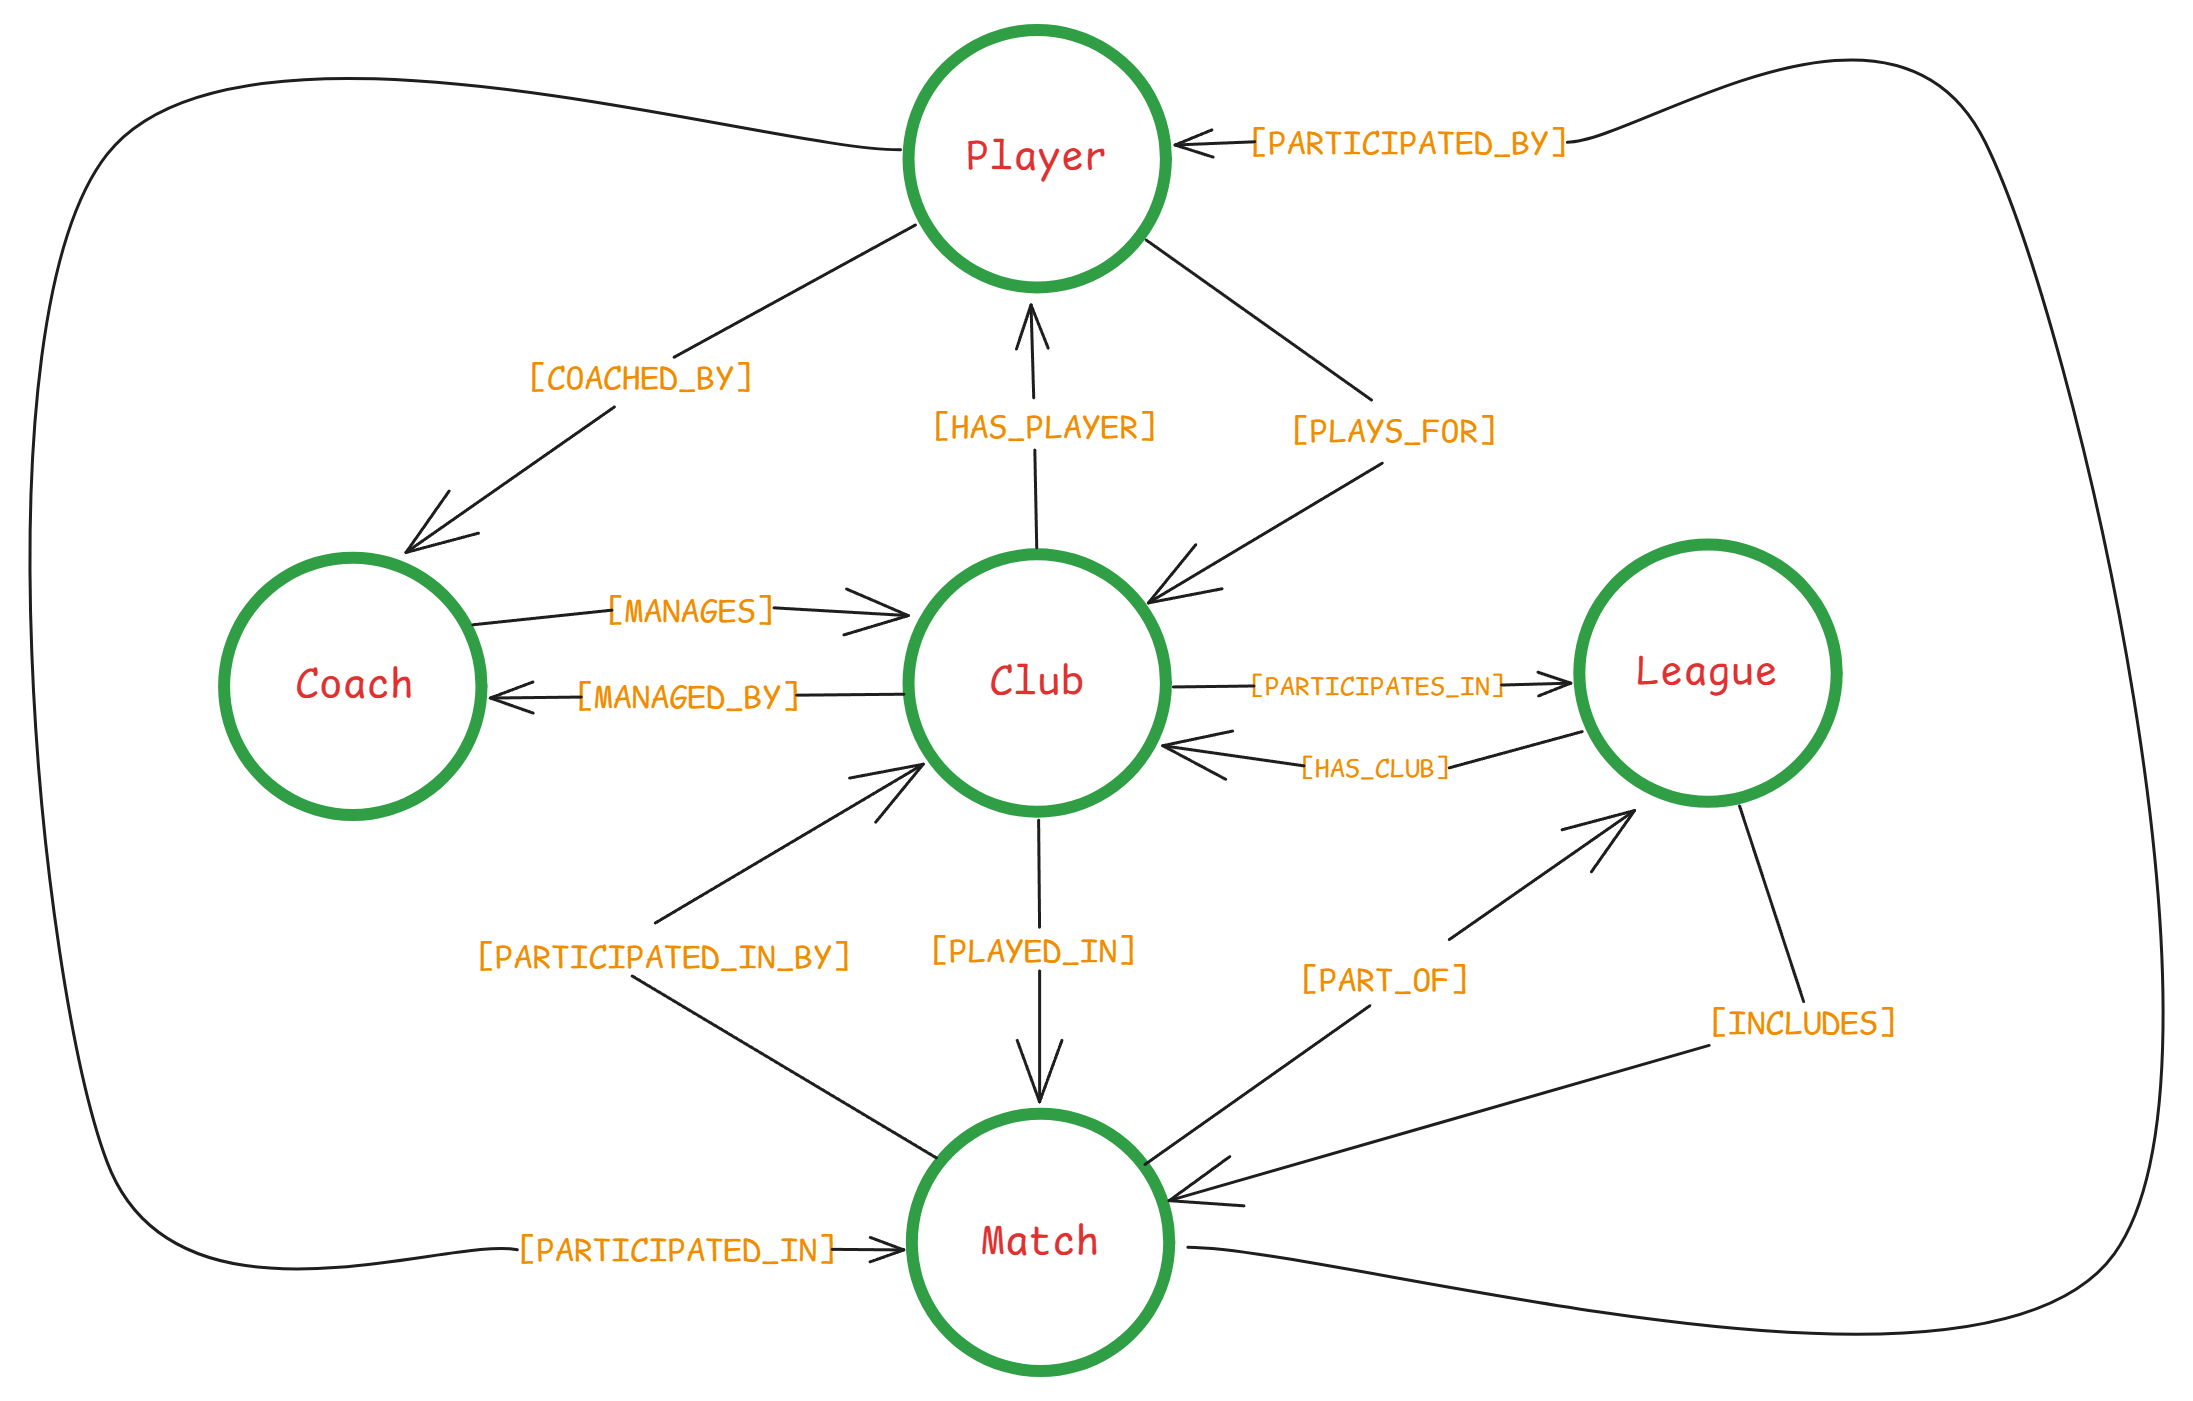

Even though this graph represents something fairly intuitive to humans, it can get pretty complicated if drawn on canvas. But with Neo4j, traversing this graph will be as straightforward as writing simple SQL joins. 

The graph has five nodes: Club, Match, League, Player, and Coach. Here is a table summarizing the node properties:

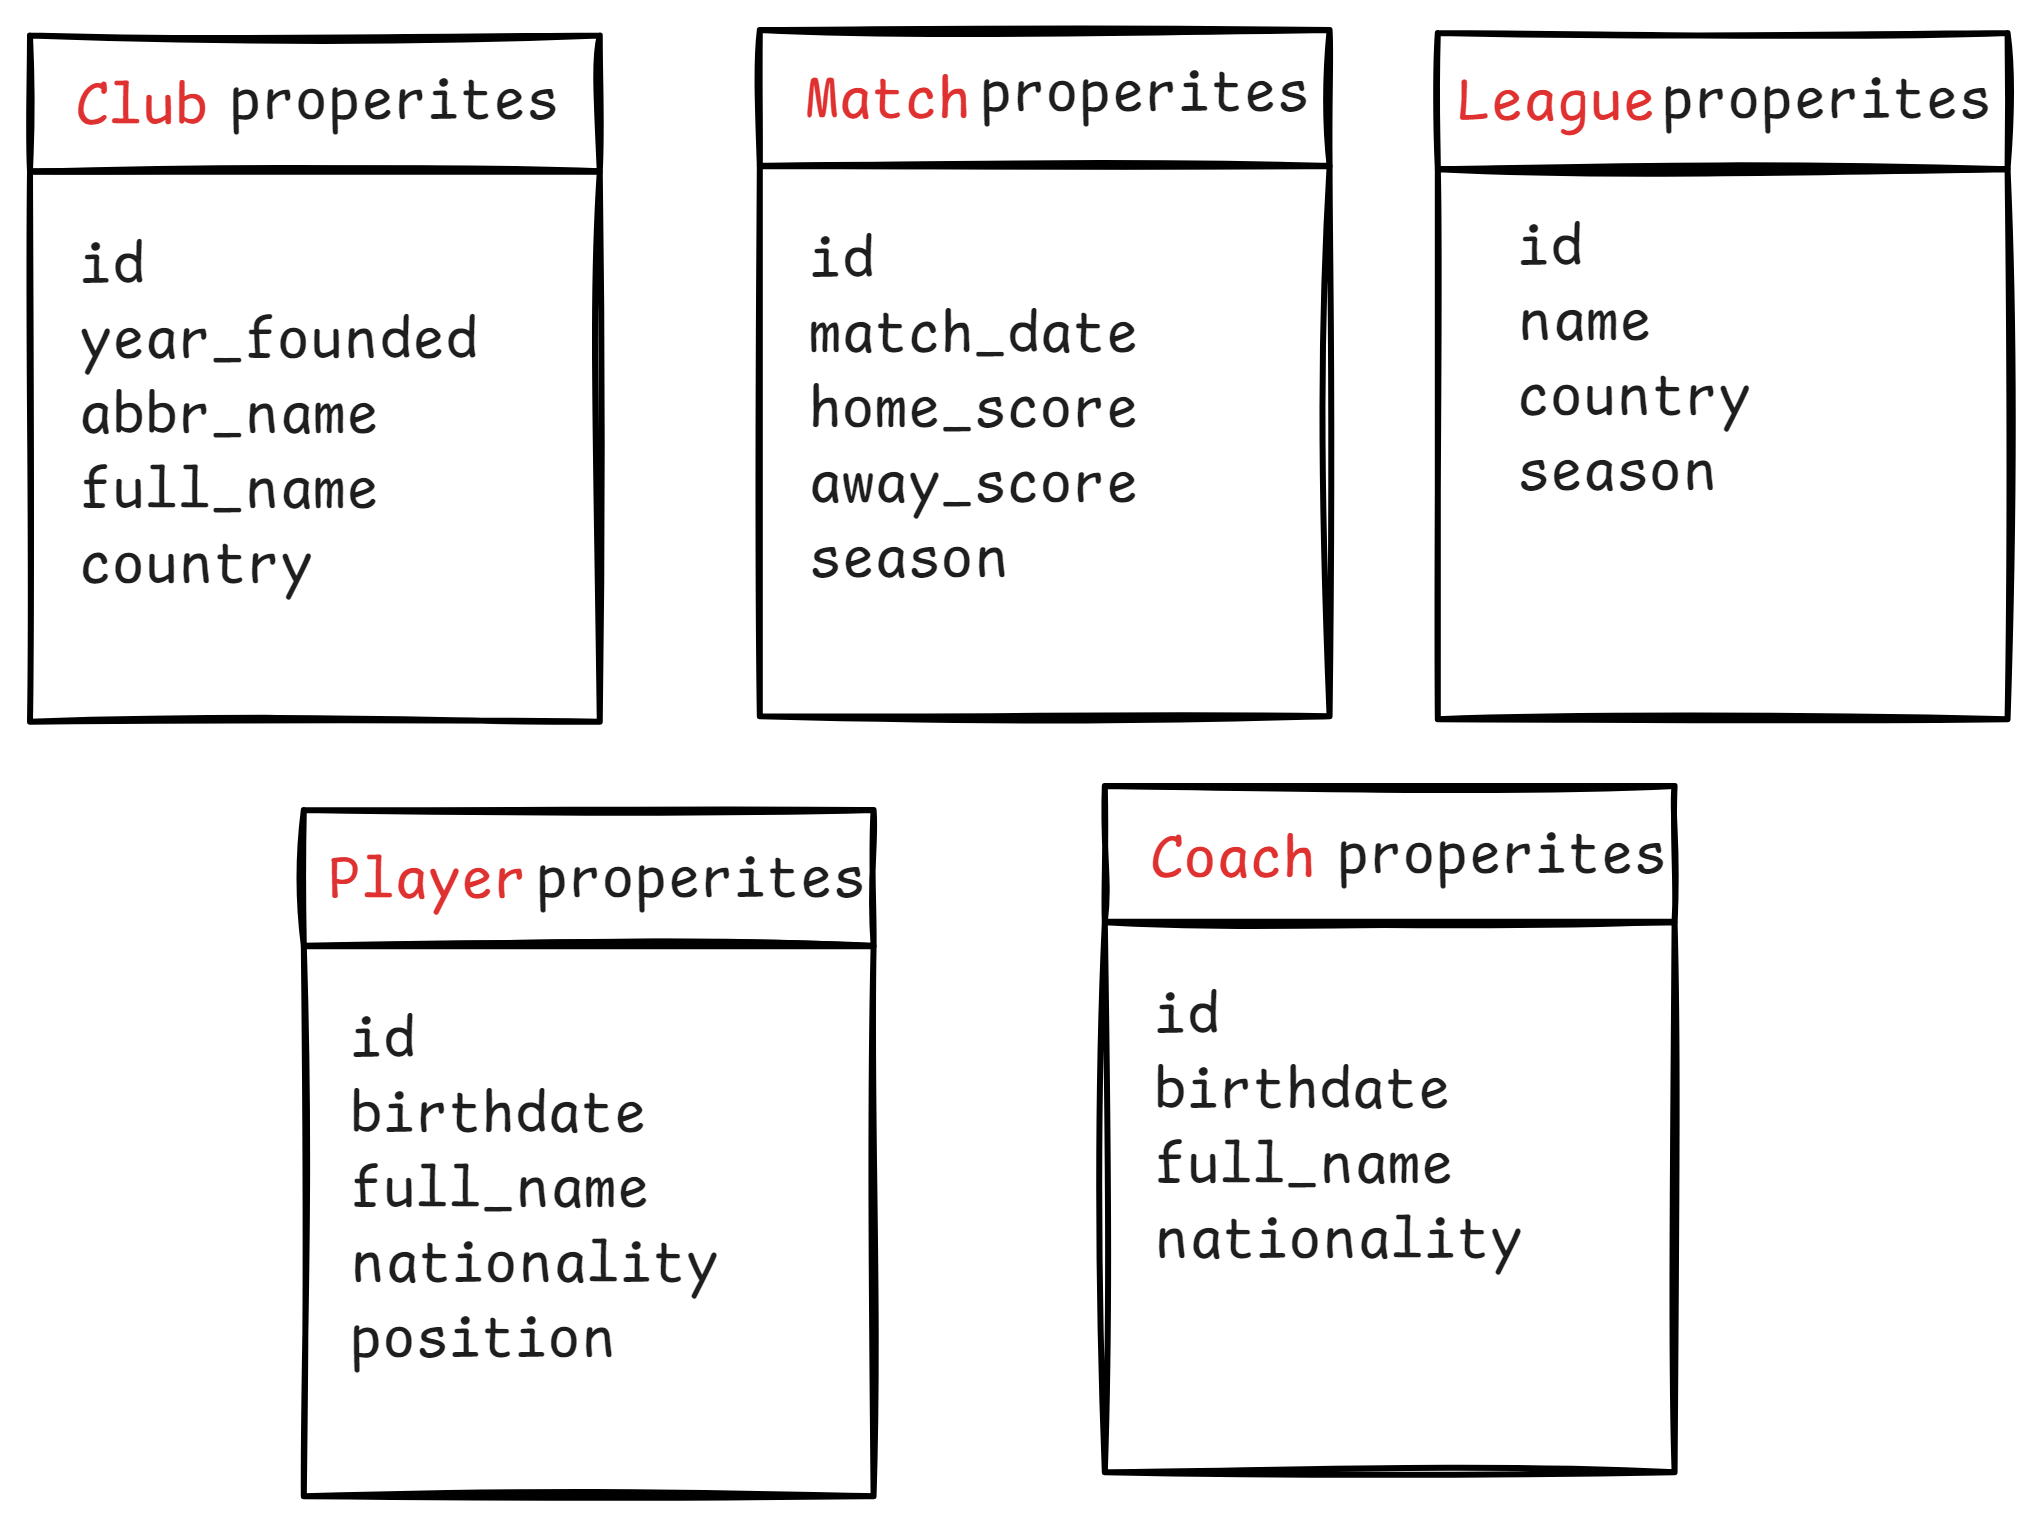

We also have 13 relationships, half of which are duplicates in reverse direction. Here are their properties:

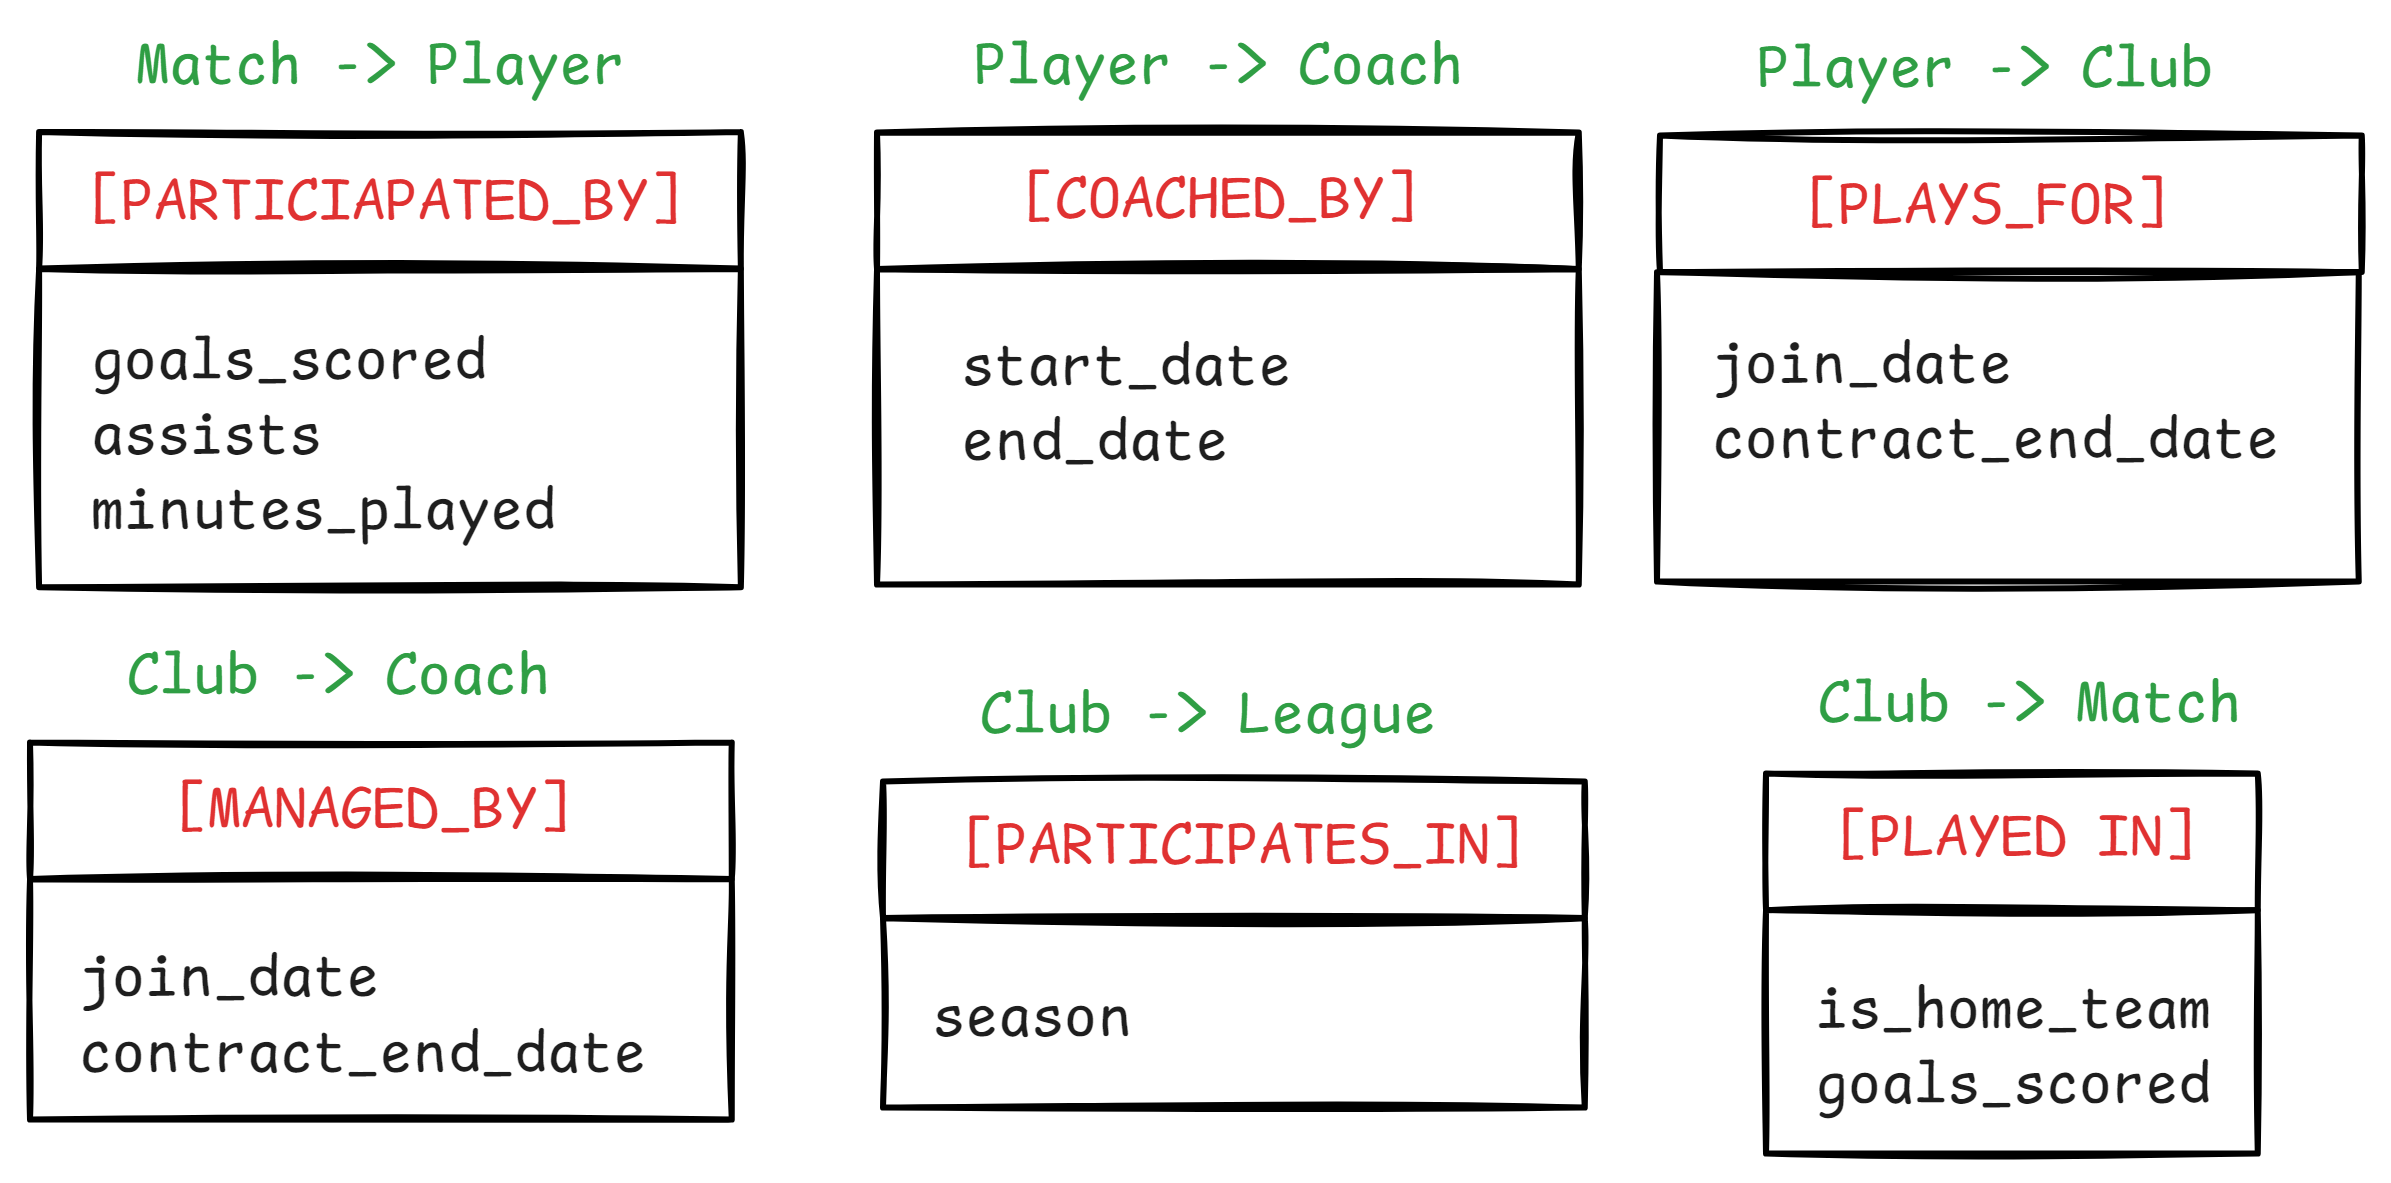

Using this structure, we can already ask hundreds of fascinating queries from the graph. Some examples include:

1. Who are the top 5 goal scorers in the Premier League for the 2022-2023 season?

2. Which players have played for multiple clubs within the same league?

3. What is the average age of players in each club of La Liga?

4. Who is the coach with the highest win rate in Champions League matches?

5. Which match in the Bundesliga had the highest total goals scored in the 2021-2022 season?

6. How many different nationalities are represented among the players in Serie A?

7. What is the average contract duration for players in Manchester United?

8. Which player has the most assists across all leagues in the current season?

9. How has the average number of goals per match changed over the last 5 seasons in the Premier League?

10. Who are the players that have both played for and later coached the same club?

But let's not get ahead of ourselves. For starters, what is Neo4j and why use it?

### Why use Neo4j?


Neo4j, the leading name in the world of graph DB management, is known for its powerful features and versatility. 

At its core, Neo4j uses native graph storage, highly optimized to carry out graph operations. Its efficiency in handling complex relations makes it outperform traditional databases for connected data. Neo4j's scalability is truly impressive: it can handle billions of nodes and relationships with ease, making it suitable for both small projects and large enterprises. 

Another key aspect of Neo4j is data integrity. It ensures full ACID (Atomicity, Consistency, Isolation, Durability) compliance, providing reliability and consistency in transactions. 

Speaking of transactions, its query language, Cypher, offers a very intuitive and declarative syntax designed for graph patterns. For this reason, its syntax has been dubbed with the "ASCII art" nickname. Cypher will be no problem to learn, especially if you are familiar with SQL. 

With Cypher, it is easy to add new nodes, relationships or properties without worrying about breaking existing queries or schema. It is adaptable to rapidly changing requirements of modern development environments. 

Neo4j has a vibrant ecosystem support. It has extensive documentation, comprehensive tools to visualize graphs, active community and integrations with other programming languages such as Python, Java, and JavaScript.

## 2. Setting Up Neo4j and Python Environment


Before we dive into working with Neo4j, we need to set up our environment. This section will guide you through creating a cloud instance to host Neo4j databases, setting up a Python environment, and establishing a connection between the two.

### Not installing Neo4j

If you wish to work with local graph databases in Neo4j, then you would need to [download and install it locally](https://neo4j.com/docs/operations-manual/current/installation/) along with its dependencies like Java. But in majority of the cases, you will be interacting with an existing remote Neo4j database on some cloud environment. 

For this reason, we won't install Neo4j on our system. Instead, we will create a free database instance on [Aura](https://neo4j.com/product/auradb/), Neo4j's fully managed cloud service. Then, we will use the `neo4j` Python client library to connect to this database and populate it with data.

### Creating a Neo4j Aura DB instance
To host a free graph database on Aura DB, visit [its product page](https://neo4j.com/product/auradb/) and click on "Get Started for Free".

Once you register, you will be presented with the available plans and you should choose the free option. Immediately, you will be given a new instance with username and password to connect to it:

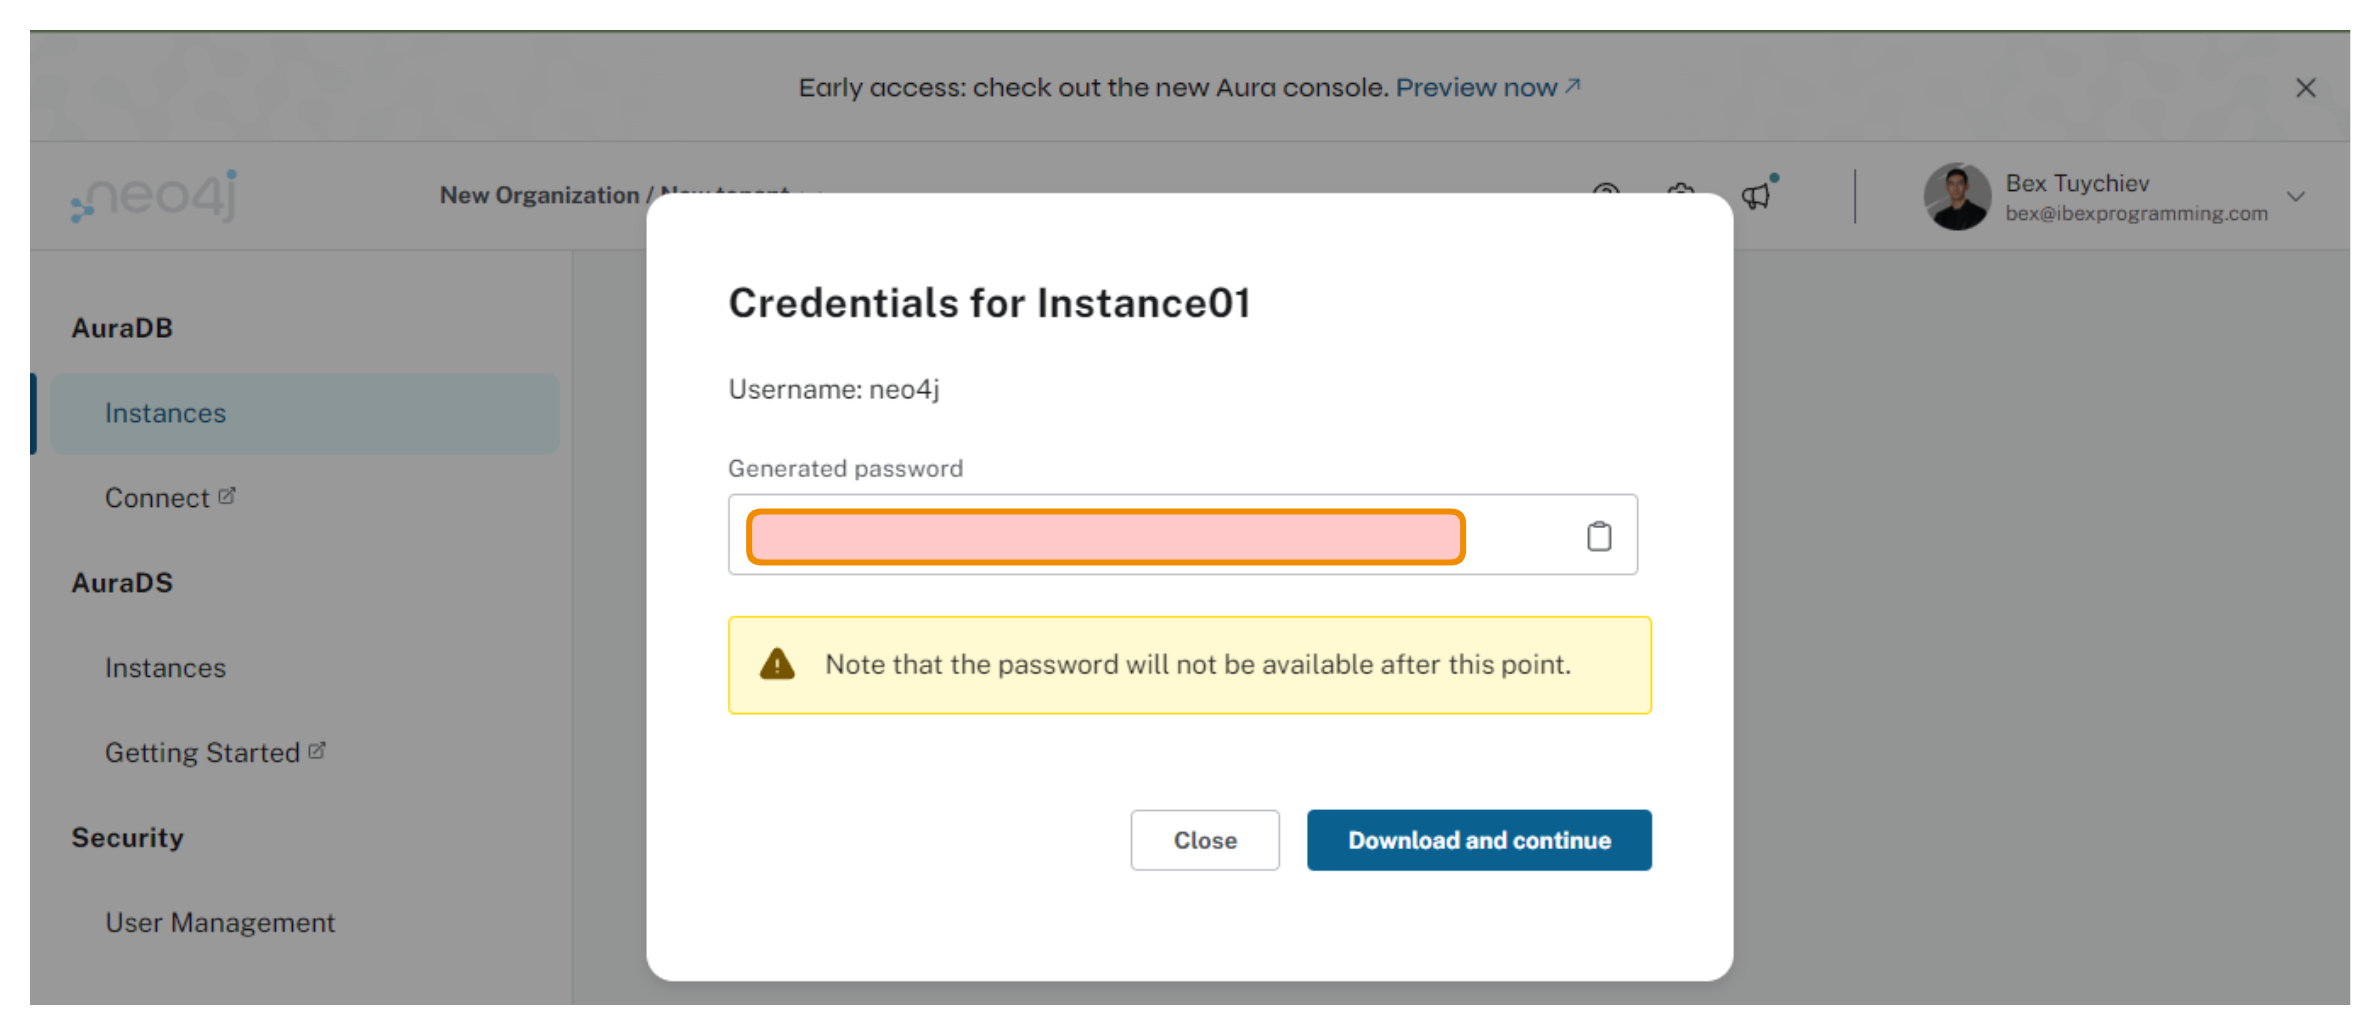

Copy your password, username and the connection URI.

Then, create a new working directory and a `.env` file to store your credentials:

```bash
$ mkdir neo4j_tutorial; cd neo4j_tutorial
$ touch .env
```

Paste the following contents inside the file:

```bash
NEO4J_USERNAME="YOUR-NEO4J-USERNAME"
NEO4J_PASSWORD="YOUR-COPIED-NEO4J-PASSWORD"
NEO4J_CONNECTION_URI="YOUR-COPIED-NEO4J-URI"
```

### Setting up the Python Environment

Now, we will install `neo4j` Python client library in a new Conda environment:

```python
$ conda create -n neo4j_tutorial python=3.9 -y
$ conda activate neo4j_tutorial
$ pip install ipykernel  # To add the environment to Jupyter
$ ipython kernel install --user --name=neo4j_tutorial
$ pip install neo4j python-dotenv
```

The commands also install `ipykernel` library and use it to add the newly created Conda environment to Jupyter as a kernel. Then, we install `neo4j` Python client to interact with Neo4j databases and `python-dotenv` to manage our Neo4j credentials in a secure manner.

### Populating an AuraDB instance with football data

Data ingestion into a graph database is a complicated process that requires knowledge of Cypher fundamentals. Since we are yet to learn about Cypher basics, you will use a Python script that I have prepared for the article that will automatically ingest real-world football data. The script will use the credentials you have stored to connect to your AuraDB instance. 

The football data comes from this Kaggle dataset on international football matches played between 1872 and 2024. The data is available in CSV format, so the script breaks it down and converts it into graph format using Cypher and Neo4j. Towards the end of the article, when we are comfortable enough with these technologies, we will go through the script line-by-line so you can understand how to convert tabular information into a graph. 

Here are the commands to run (ensure you have set up the AuraDB instance and stored your credentials in a .env file in your working directory):

```bash
$ the commands
```

### Connecting to Neo4j From Python

Now, we are ready to connect to our Aura DB instance. First, we will read our credentials from the `.env` file using `dotenv`:

In [10]:
import os
from dotenv import load_dotenv

load_dotenv()

NEO4J_USERNAME = os.getenv("NEO4J_USERNAME")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")
NEO4J_URI = os.getenv("NEO4J_URI")

Now, let's establish a connection:

In [12]:
from neo4j import GraphDatabase

uri = NEO4J_URI
username = NEO4J_USERNAME
password = NEO4J_PASSWORD

driver = GraphDatabase.driver(uri, auth=(username, password))

try:
    driver.verify_connectivity()
    print("Connection successful!")
except Exception as e:
    print(f"Failed to connect to Neo4j: {e}")

Connection successful!


Here is an explanation of the code:

1. We import `GraphDatabase` from `neo4j` to interact with Neo4j.

2. We use the previously loaded environment variables to set up our connection (`uri`, `username`, `password`).

3. We create a driver object using `GraphDatabase.driver()`, establishing a connection to our Neo4j database.

4. Under a `with` block, we use the `verify_connectivity()` function to see if a connection is established. By default, `verify_connectivity()` returns nothing if a connection is successful. 

Once the tutorial finishes, call `driver.close()` to terminate the connection and free up resources. Driver objects are expensive to create, so you should only create a single object for your application.

## 3. Cypher Query Language Essentials


### What a graph database looks like?

Now that our environment is ready, let's quickly cover the fundamentals of the Cypher query language. To demonstrate its capabilities, we will use the following graph:

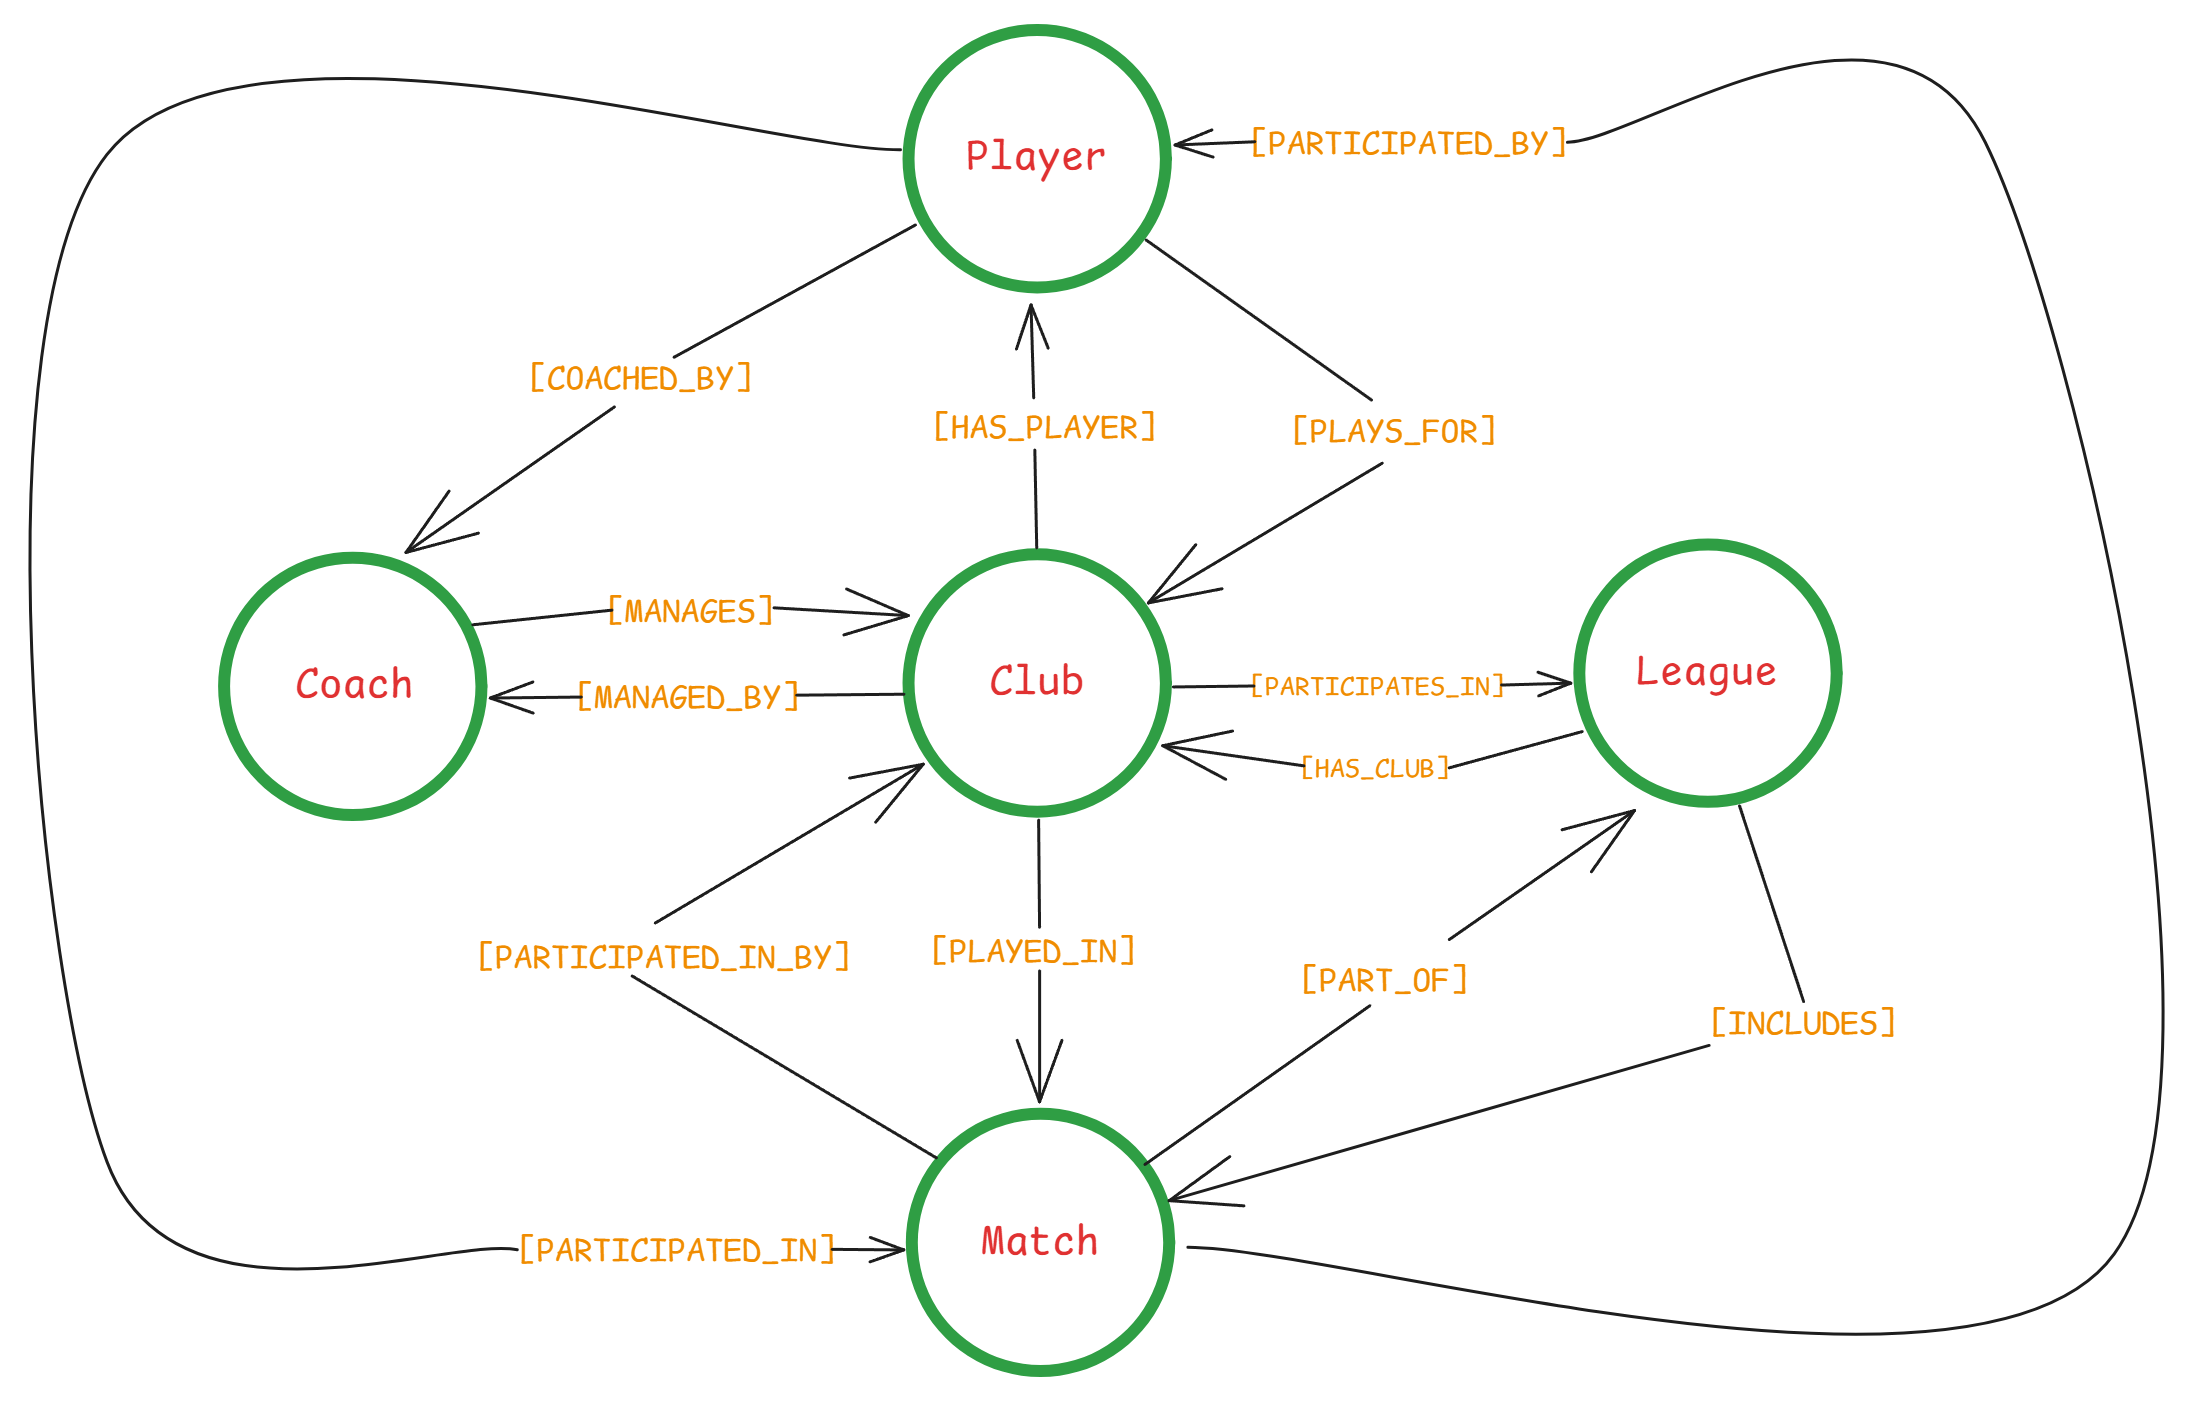

But let's not get ahead of ourselves. Right now, our Aura DB instance is empty, so we need to populate it with data based on our graph. For this purpose, I have created three files for you:

1. `football_dataset.json`

This JSON dataset contains football data on 114 fake matches played by 60 fake clubs in three leagues: La Liga, Bundesliga, and Premier League. The file also contains 20 fake players per club, match statistics and player information. Please, download the file with cURL to your working directory:

```bash
$ curl -O https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2024/9_september/3_neo4j_python/football_dataset.json
```

2. `ingest_football_data.py`

This Python script reads the information from the JSON file and ingests it into a Neo4j dataset using your credentials saved in a `.env` file. Please, download it to your working directory and run it:

```bash
$ curl -O https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2024/9_september/3_neo4j_python/ingest_football_data.py

$ python ingest_football_data.py
```

3. `generate_dataset.py`

This optional script generates the `football_dataset.json` file you have downloaded earlier using the `Faker` library.

> Note that the generated fake dataset is not fully representative of our football graph database. For simplicity, I didn't add many node and relationship properties. 

Since data modeling in Neo4j is complex, we will break down the contents of these files in the later sections. For now, let's learn the basics of Cypher and how to query the data we just ingested. 

### Basic syntax and structure


Cypher's syntax is designed to be intuitive and visually representative of graph structures. It relies on the following ascii-art type of syntax:

```sql
(nodes)-[:CONNECT_TO]->(other_nodes)
```

Let's break down the key components of this general query pattern:

1. **Nodes**: 

Notes are wrapped with parentheses `()` and can include aliases prefixed with a colon: `(p:Player)` - a Player node aliased as `p`. Aliases make it easier to refer to nodes with long names and make queries more readable and compact.

The node properties can also be specified for more precise matching: `(p:Player {name: "Robert Lewandowski"})`. Node properties aren't wrapped in quotes while their values are.

2. **Relationships**:

Relationships are wrapped with arrows `-[RELATIONSHIP]->`. Again, you can include properties inside braces. For example:

```sql
(p:Player {name: "Robert Lewandowski"})-[r:PARTICIPATED_IN {goals_scored: 4}]->(m:Match)
``` 

This (sub-) query finds matches Lewandowski participated in and scored four goals. The query also shows that relationships can also be aliased by putting colons in front.

3. **Clauses**:

Cypher has different clauses to structure your query logic like SQL. Here are the most commonly used clauses:

- `MATCH`: Pattern matching in the graph
- `WHERE`: Filtering the results
- `RETURN`: Specifying what to include in the result set
- `CREATE`: Creating new nodes or relationships
- `MERGE`: Creating unique nodes or relationships
- `DELETE`: Removing nodes, relationships, or properties
- `SET`: Updating labels and properties

Here's a simple query that demonstrates these concepts:

```sql
MATCH (p:Player)-[r:PLAYS_FOR]->(c:Club)
WHERE c.name = "Manchester United" AND p.age < 25
RETURN p.name, p.birthdate, r.join_date
ORDER BY p.name DESC
LIMIT 5
```

This query:
- Matches players who play for Manchester United
- Filters for players under 25 years old
- Returns their names, birth dates, and when they joined the club
- Orders the results by name in descending order
- Limits the output to 5 players

As you can see, the query almost reads like SQL but its SQL equivalent would involve at least one JOIN.

## 4. Using Neo4j Python Driver to Run Cypher Queries

In [34]:
def run_query(query, params={}):
    with driver.session() as session:
        result = session.run(query, params)
        return [record.data() for record in result]

query = """
MATCH (p:Player)-[r:PLAYS_FOR]->(c:Club)
RETURN p.name AS player, c.name AS club
LIMIT 5
"""

results = run_query(query)
for result in results:
    print(f"{result['player']} plays for {result['club']}")

Dr. Michael Kelly (West Joy FC)
Marco Willis (West Joy FC)
James Myers (West Joy FC)
Joel Richards (West Joy FC)
Joseph Allen (West Joy FC)


## 5. Advanced Querying with Cypher


### Complex queries


### Pattern matching


### Aggregations and sorting



## 6. Working with Neo4j in Python


### Using the Neo4j Python driver


### Executing Cypher queries from Python


### Handling results



## 7. Visualizing Graph Data


### Tools for graph visualization


### Creating simple visualizations in Python



## 8. Best Practices and Optimization Tips


### Data modeling guidelines


### Query optimization


### Common pitfalls to avoid



## 9. Real-world Use Case: Building a Recommendation System


### Designing the graph model


### Implementing recommendation queries


### Integrating with a Python application



## 10. Conclusion and Next Steps


### Recap of key concepts


### Resources for further learning


### Emerging trends in graph databases